In [1]:
# Bibliotecas para manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install alpha_vantage

In [4]:
# bibliotecas para análise de mercado
from pandas_datareader import data as pdr
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953857   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669983   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943970   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  
        Adj Close  Daily Return
count  251.000000    250.000000
mean   153.523794     -0.001074
std     12.774159      0.022471
min    125.339417     -0.058680
25%    143.656761     -0.015816
50%    152.767532     -0.001360
75%    164.352898      0.013388
max    179.953857      0.088974


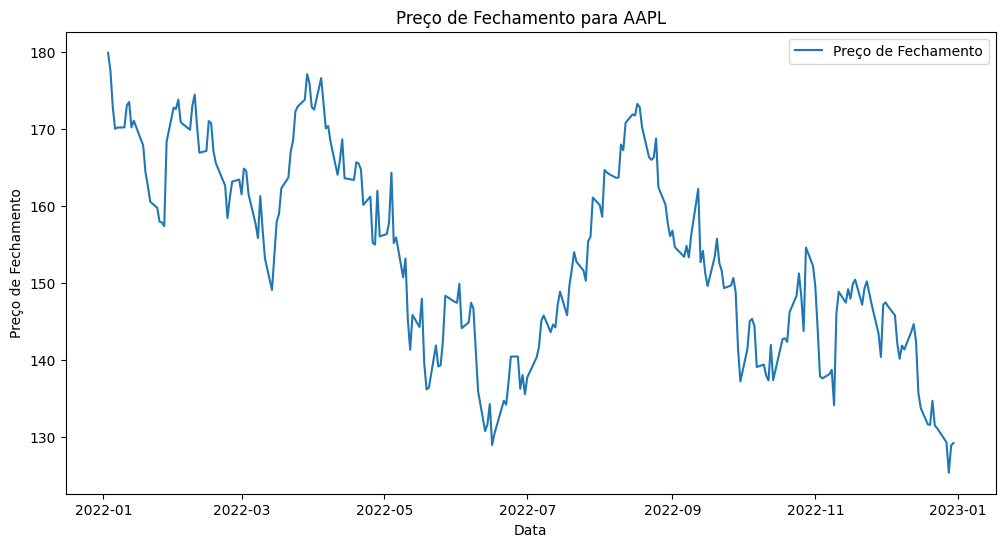

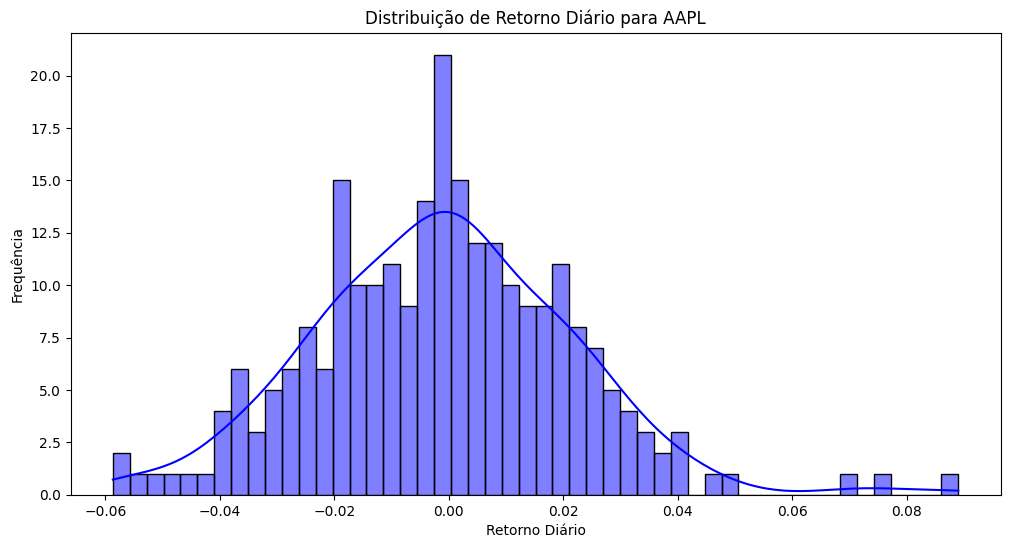

In [6]:
# Configurar o yfinance
yf.pdr_override()

# Definir o símbolo da ação e o intervalo de datas desejado
symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Obter dados históricos usando o pandas_datareader
historical_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Exibir as primeiras linhas dos dados
print(historical_data.head())

# Calcular o retorno diário
historical_data['Daily Return'] = historical_data['Adj Close'].pct_change()

# Estatísticas descritivas
print(historical_data[['Adj Close', 'Daily Return']].describe())

# Gráfico de preços de fechamento usando matplotlib
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Adj Close'], label='Preço de Fechamento')
plt.title(f"Preço de Fechamento para {symbol}")
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

# Gráfico de retorno diário usando seaborn
plt.figure(figsize=(12, 6))
sns.histplot(historical_data['Daily Return'].dropna(), bins=50, kde=True, color='blue')
plt.title(f"Distribuição de Retorno Diário para {symbol}")
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

In [19]:
for i in dir(yf):
  if '__' not in i:
    print(i)

Ticker
Tickers
base
cache
const
data
download
enable_debug_mode
exceptions
multi
pdr_override
scrapers
set_tz_cache_location
shared
ticker
tickers
utils
version


In [27]:
data = yf.download("SPY AAPL");data

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
1980-12-12    0.099319         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094137         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087228         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089387         NaN    0.115513         NaN    0.116071   
1980-12-18    0.091978         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2024-01-12  185.919998  476.679993  185.919998  476.679993  186.740005   
2024-01-16  183.630005  474.929993  183.630005  474.929993  184.259995   
2024-01-17  182.679993  472.290009  182.679993  472.290009  182.929993   
2024-01-18  188.630005  476.489990  188.630005  476.489990  189.139999   
2024-01-19  191.559998  482.429993  191.559998  482.429993  191.949997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2024-01-12  478.600006  185.190002  475.230011  186.059998  477.839996   
2024-01-16  476.609985  180.929993  473.059998  182.160004  475.260010   
2024-01-17  472.790009  180.300003  469.869995  181.270004  471.820007   
2024-01-18  477.059998  185.830002  472.420013  186.089996  474.010010   
2024-01-19  482.709991  188.820007  476.537415  189.330002  477.649994   

               Volume              
                 AAPL         SPY  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2024-01-12   40444700  57944000.0  
2024-01-16   65603000  85014900.0  
2024-01-17   47317400  68843900.0  
2024-01-18   78005800  91856200.0  
2024-01-19   65761937  97503936.0  

[10866 rows x 12 columns]

<Axes: xlabel='Date'>

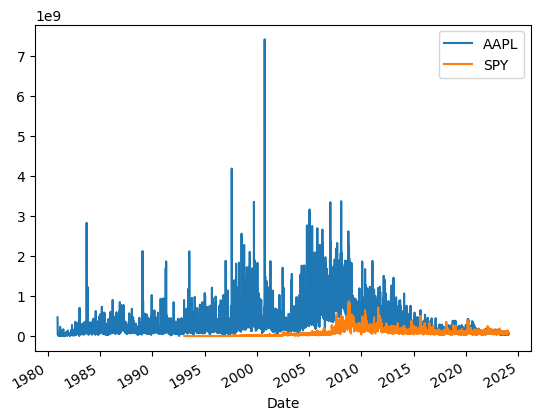

In [31]:
data['Volume'].plot()